<a href="https://colab.research.google.com/github/Rodriggo-Marcelino/clusterizacao_aglomerativa/blob/main/agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #pip install geopandas

In [ ]:
 #pip install descartes

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

sns.set()


In [6]:
uploaded = files.upload()

Saving World_Bank.csv to World_Bank.csv


In [7]:
df = pd.read_csv("World_Bank.csv",sep=' ')
df.head()

,inflacao,pib_per_capita,crescimento_pib,desemprego
United Arab Emirates,3.068147,43004.948646,1.423840,2.575
Albania,2.020790,5253.630064,4.004413,13.898
Armenia,2.520234,4212.070943,5.200000,17.712
Angola,20.190374,3432.385736,-2.133493,7.253
Austria,1.998382,51512.905475,2.729083,4.786


In [8]:
df.shape

(134, 4)

In [9]:
df.describe()

,inflacao,pib_per_capita,crescimento_pib,desemprego
count,134.000000,134.000000,134.000000,134.000000
mean,3.561733,17596.639838,3.408318,6.846358
std,3.797585,22718.772784,2.228776,5.373266
min,-2.814698,275.429603,-3.815710,0.142000
25%,1.507143,2564.751352,1.892515,3.373500
50%,2.517135,7253.779541,3.110311,5.324000
75%,4.283929,23128.944589,4.876709,8.891250
max,23.563515,114340.498742,8.671683,26.958000


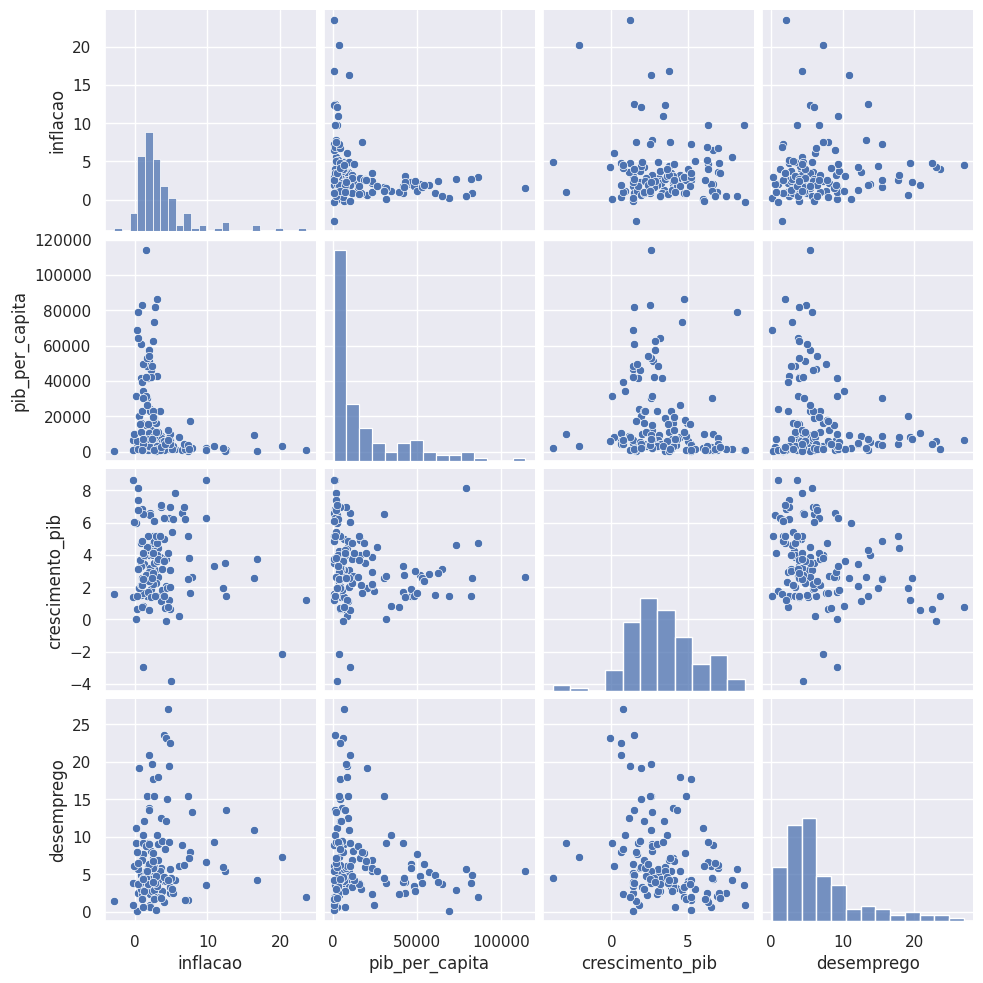

In [10]:
sns.pairplot(df)

<Axes: >

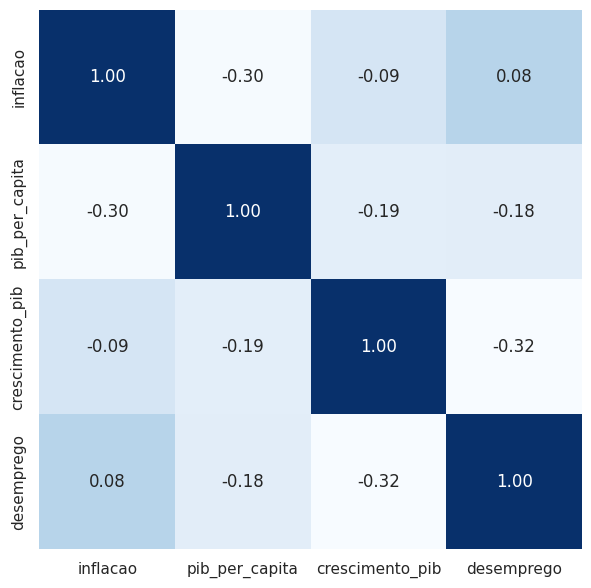

In [11]:
plt.figure(figsize=(7, 7))
corr = np.corrcoef(df.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df.columns, yticklabels=df.columns)

In [12]:
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)


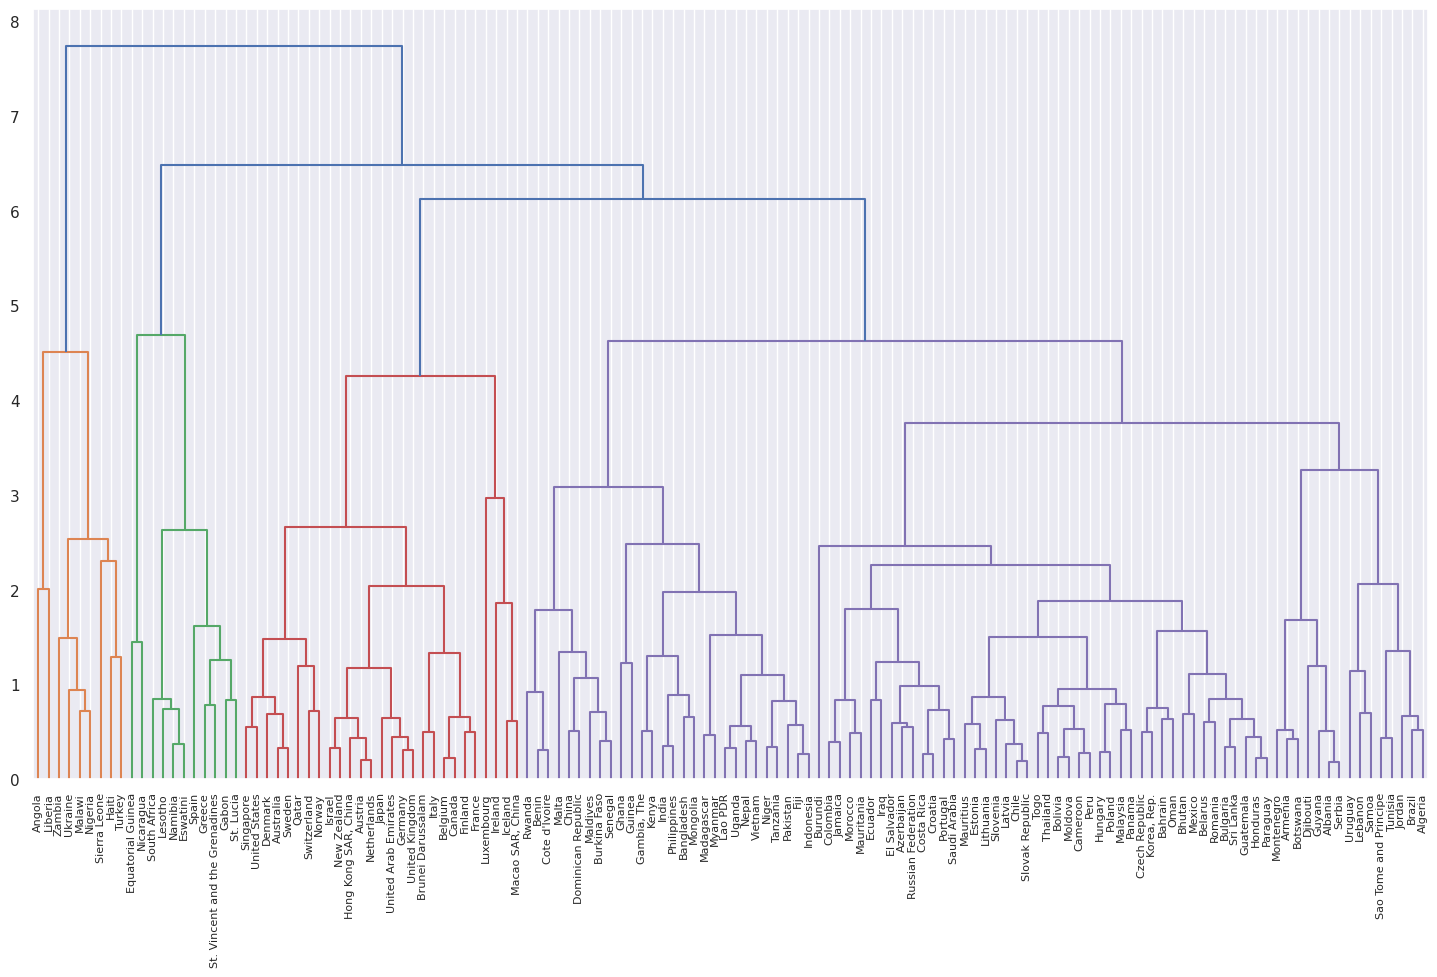

In [13]:
Z = hierarchy.linkage(df_scaled, 'complete')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

In [14]:
paises_interesse = ['Brazil',
                    'China',
                    'Uruguay',
                    'Paraguay',
                    'Chile',
                    'Peru',
                    'Bolivia',
                    'Ecuador',
                    'Colombia',
                    'Germany',
                    'United States',
                    'United Kingdom',
                    'Poland']

df_paises = df_scaled.loc[paises_interesse, :]
print(df_paises.shape)


(13, 4)


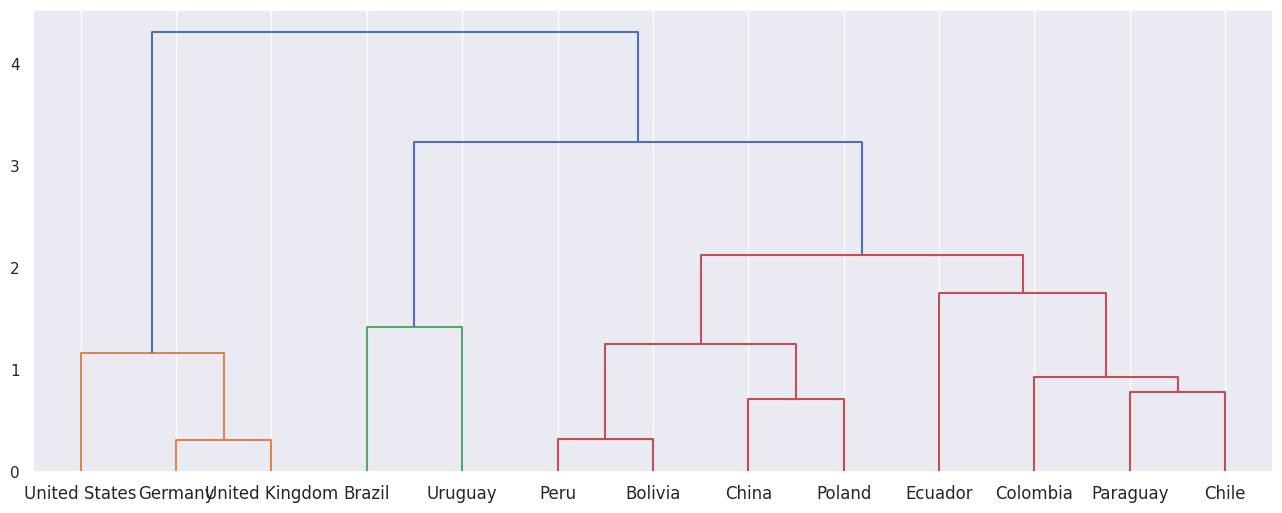

In [15]:
Z = hierarchy.linkage(df_paises, 'ward')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)



In [16]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(df_paises)



In [17]:
groups

array([2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [18]:
countries = list(df_paises.index)
grouped_countries = {i: [] for i in range(n_clusters)}
for country, group in zip(countries, groups):
    grouped_countries[group].append(country)

for gp, ctr in grouped_countries.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['China', 'Paraguay', 'Chile', 'Peru', 'Bolivia', 'Ecuador', 'Colombia', 'Poland']

Cluster 1: ['Germany', 'United States', 'United Kingdom']

Cluster 2: ['Brazil', 'Uruguay']

